In [2]:
import pandas as pd
import seaborn as sns
import textblob
import json
import datetime

In [3]:
tweets = pd.read_json("twitter_crawl/hashtags-20200301-20201109_v2.json", lines=True, orient='records')

In [13]:
# https://stackoverflow.com/a/1060330
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + datetime.timedelta(n)

def build_dt(df):
    start_date = datetime.date(2020, 3, 1)
    end_date = datetime.date(2020, 9, 1)

    for date in daterange(start_date, end_date):
        yield date, sum(df['date'] == date.strftime("%Y-%m-%d"))
def build_dt1(df, ocol):
    start_date = datetime.date(2020, 3, 1)
    end_date = datetime.date(2020, 9, 1)

    for date in daterange(start_date, end_date):
        try:
            yield date, sum(df.loc[df['date'] == date.strftime("%Y-%m-%d"), ocol]) / sum(df['date'] == date.strftime("%Y-%m-%d"))
        except:
            yield date, 0
# sns.lineplot(data=pd.DataFrame(build_dt(tweets), columns=['date', 'count']), x='date', y='count')

In [17]:
sum(tweets['date'] == date.strftime("%Y-%m-%d"))

153

<AxesSubplot:xlabel='date', ylabel='count'>

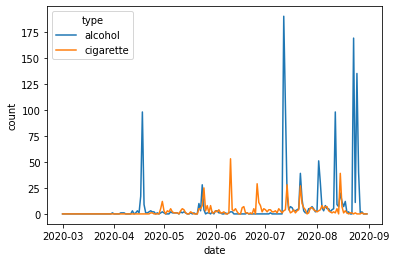

In [44]:
cb = pd.DataFrame(build_dt(tweets[tweets['hashtags'].apply(lambda x: 'cigaretteban' in x)]), columns=['date', 'count'])
ab = pd.DataFrame(build_dt(tweets[tweets['hashtags'].apply(lambda x: 'alcoholban' in x)]), columns=['date', 'count'])

cb['type'] = 'cigarette'
ab['type'] = 'alcohol'

combined = ab.append(cb)

# combined.loc[combined['type'] == 'cigarette', 'count'] *= -1

sns.lineplot(data=combined, x='date', y='count', hue='type')

In [5]:
tweets['sentiment'] = tweets['tweet'].apply(lambda t: textblob.TextBlob(t).sentiment.polarity)

In [6]:
tweets['sentiment_type'] = 'Neutral'
tweets.loc[tweets['sentiment'] > 0, 'sentiment_type'] = 'Positive'
tweets.loc[tweets['sentiment'] < 0, 'sentiment_type'] = 'Negative'

<AxesSubplot:xlabel='date', ylabel='sentiment'>

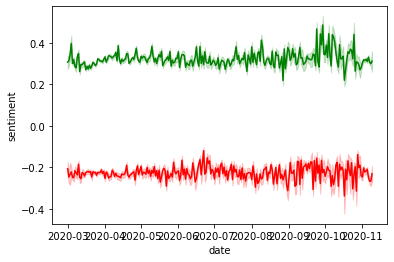

In [47]:
sns.lineplot(data=tweets[tweets['sentiment_type'] != 'Neutral'], x='date', y='sentiment', hue='sentiment_type', palette=['green', 'red'], legend=False, ci=68)

11.950757153438897
<class 'matplotlib.axes._subplots.AxesSubplot'>


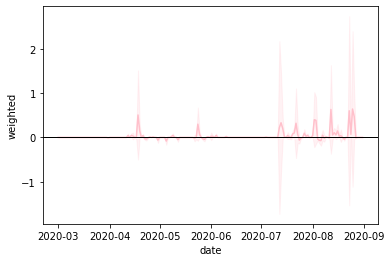

In [50]:
def hashtags(hashtag):
    tweetsl = tweets[tweets['hashtags'].apply(lambda x: hashtag in x)]
    ps = pd.DataFrame(build_dt1(tweetsl[tweetsl['sentiment_type'] == 'Positive'], 'sentiment'), columns=['date', 'sentiment'])
    ps['count'] = pd.DataFrame(build_dt(tweetsl[tweetsl['sentiment_type'] == 'Positive']), columns=['date', 'count'])['count']
    ptotal = sum(ps['count'])
    ps['type'] = 'Positive'

    ns = pd.DataFrame(build_dt1(tweetsl[tweetsl['sentiment_type'] == 'Negative'], 'sentiment'), columns=['date', 'sentiment'])
    ns['count'] = pd.DataFrame(build_dt(tweetsl[tweetsl['sentiment_type'] == 'Negative']), columns=['date', 'count'])['count']
    ntotal = sum(ns['count'])
    ns['type'] = 'Negative'

#     ps['weighted'] = ps['sentiment'] * (ps['count'] / (ptotal + ntotal)) * 100
#     ns['weighted'] = ns['sentiment'] * (ns['count'] / (ptotal + ntotal)) * 100
#     print(sum((ps['count'] / (ptotal + ntotal)) * 100))

    sent_combined = ps.append(ns)
#     print(sent_combined[sent_combined['weighted'] > 1])
    sent_combined['weighted'] = sent_combined['sentiment'] * (sent_combined['count'] / sum(sent_combined['count']) * 100)
    print(sum(sent_combined['weighted']))
    
    p = sns.lineplot(data=sent_combined, x='date', y='weighted', color='pink')#, hue='type')
    p.axhline(0, color='black', lw=1)
    print(type(p))
    
hashtags('alcoholban')

In [76]:
sum((ns['count'] / (ptotal + ntotal)))

0.3108039692183069